In [61]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

from tools_analysis import *

In [62]:
folder_path = "../study"
stats_path = folder_path + "/stats"

In [71]:
# Reading the whole dataset
df = pd.read_csv("%s/dataset_thres1_1.csv" % stats_path, index_col="ID")
print(df.shape)
# # Removing the healty subjects
# df.dropna(axis=0, how="any", inplace=True) 
# print(df.shape)

info = df.columns[:10]
df[info] = df[info].astype(int)

# df = df.drop("VNSLC_16") # remove it because doesn't have the tracts from freesurfer
df = df.dropna(axis=1) # remove NaN features
df = df.drop(df.filter(regex=r'(min|max)'), axis=1) # remove max and min features because are full of imperfections
df = df.drop(df.filter(regex=r'(_f0_|_f1_|_c0_|_c1_|nTracts)'), axis=1) # remove them beacuse they have an high variability and difficult to interpretare (only kurt)
df = df.loc[:, (abs(df - df.iloc[0]) > 1e-12).any()] # Removing almost constant features
df = df.drop("resp", axis=1)
print(df.shape)

(19, 7528)
(19, 3941)


In [72]:
from sklearn.preprocessing import RobustScaler

# Standard Scaler
X_scaled = df.filter(regex=r'mean|std|skew|kurt|voxVol|age|duration') # Take only the contineus value
index, columns = X_scaled.index, X_scaled.columns
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_scaled)
X = pd.DataFrame(X_scaled, index=index, columns=columns)
df_standardized = pd.concat([df["respPart"], X], axis=1)

In [73]:
df_standardized.insert(0,"myLabel", [1,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0])
df.insert(0,"myLabel", [1,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0])

In [74]:
from scipy.stats import mannwhitneyu

normal = df_standardized[df["myLabel"] == 0]
weird = df_standardized[df["myLabel"] == 1]


pvals = {col: mannwhitneyu(weird[col], normal[col], method="auto").pvalue for col in df_standardized.columns}

pvals = {k:v for k, v in sorted(pvals.items(), key=lambda x: x[1])}


In [75]:
pvals

{'myLabel': 2.811164046529016e-05,
 'acomm_fvf_tot_skew': 7.371369600471768e-05,
 'acomm_wfvf_skew': 7.371369600471768e-05,
 'cc.genu_fvf_tot_mean': 7.371369600471768e-05,
 'cc.genu_fvf_tot_skew': 7.371369600471768e-05,
 'cc.genu_wfvf_mean': 7.371369600471768e-05,
 'cc.genu_wfvf_skew': 7.371369600471768e-05,
 'cc.splenium_fvf_tot_skew': 7.371369600471768e-05,
 'left-antThalRadiation_fvf_tot_mean': 7.371369600471768e-05,
 'left-antThalRadiation_wfvf_mean': 7.371369600471768e-05,
 'left-antThalRadiation_wfvf_skew': 7.371369600471768e-05,
 'left-fornix_fvf_tot_mean': 7.371369600471768e-05,
 'left-fornix_fvf_tot_skew': 7.371369600471768e-05,
 'left-fornix_wfvf_mean': 7.371369600471768e-05,
 'left-inf-longi-fasci_fvf_tot_mean': 7.371369600471768e-05,
 'left-inf-longi-fasci_fvf_tot_skew': 7.371369600471768e-05,
 'left-inf-longi-fasci_wfvf_mean': 7.371369600471768e-05,
 'left-inf-longi-fasci_wfvf_skew': 7.371369600471768e-05,
 'left-infThalRadiation-insula_fvf_tot_mean': 7.371369600471768e-05

<Axes: xlabel='myLabel', ylabel='acomm_fvf_tot_skew'>

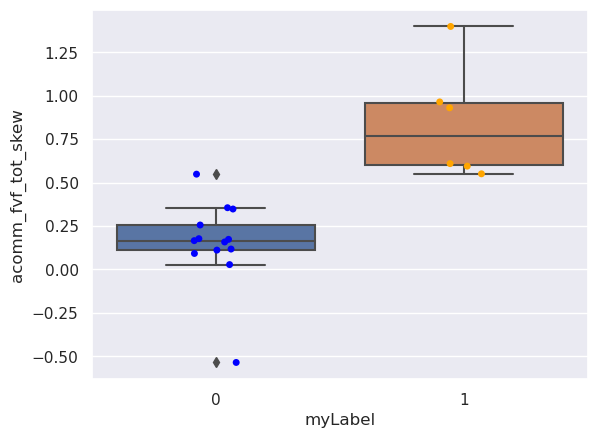

In [76]:
feature = "acomm_fvf_tot_skew"
ax = sns.boxplot(df, y=feature, x="myLabel")
sns.stripplot(df, y=feature, x="myLabel", hue="myLabel", palette=["blue", "orange"], legend=False)